# Kampus Merdeka 6: IBM & Skilvul
# Data Science Phase Challenge

# Problem Definition
## Latar Belakang
Penyakit stroke merupakan kondisi serius yang terjadi akibat gangguan aliran darah ke otak, yang dapat menyebabkan kerusakan pada sel-sel otak dan memiliki potensi untuk mengancam nyawa serta kualitas hidup seseorang. Memahami faktor-faktor risiko yang terkait dengan stroke sangat penting dalam upaya pencegahan dan penanganan penyakit ini. Beberapa faktor risiko utama termasuk tekanan darah tinggi, penyakit jantung, gangguan kolesterol, merokok, diabetes, obesitas, dan gaya hidup tidak sehat. Mengetahui faktor-faktor ini memungkinkan untuk mengambil langkah-langkah pencegahan yang tepat, seperti pengelolaan tekanan darah, kontrol kolesterol, berhenti merokok, menjaga berat badan ideal, dan mengadopsi gaya hidup sehat secara umum.

Kemampuan untuk memprediksi risiko stroke juga merupakan hal yang penting dalam konteks manajemen klinis. Dengan menggunakan data klinis dan informasi mengenai faktor risiko, kita dapat mengembangkan model prediksi yang dapat mengidentifikasi individu yang berisiko tinggi mengalami stroke. Dengan pendekatan ini, intervensi dini dapat dilakukan untuk mengurangi risiko terjadinya stroke dan potensi komplikasi, sehingga membantu dalam meningkatkan kualitas hidup dan mengurangi beban penyakit secara keseluruhan.
## Tujuan Penelitian
Tujuan penelitian ini adalah untuk mengembangkan model prediksi risiko stroke berdasarkan data pasien, sehingga dapat membantu dalam identifikasi dini pasien yang berisiko mengalami stroke.
## Rumusan Masalah
Bagaimana cara membangun model prediksi risiko stroke berdasarkan data klinis pasien?
Seberapa akurat model prediksi tersebut dalam memprediksi kemungkinan seseorang mengalami stroke?
## Data yang akan dipakai
Data yang akan digunakan berasal dari Kaggle dan berisi informasi tentang pasien-pasien yang telah mengalami atau belum mengalami stroke. Deskripsi atribut-atribut data sebagai berikut:
gender: Jenis kelamin pasien (Male, Female)
age: Usia pasien
hypertension: Apakah pasien memiliki hipertensi (0: Tidak, 1: Ya)
heart_disease: Apakah pasien memiliki penyakit jantung (0: Tidak, 1: Ya)
ever_married: Apakah pasien pernah menikah (No, Yes)
work_type: Jenis pekerjaan pasien (Children, Govt_job, Never_worked, Private, Self-employed)
Residence_type: Tipe tempat tinggal pasien (Rural, Urban)
avg_glucose_level: Rata-rata level glukosa dalam darah pasien
BMI: Indeks massa tubuh (Body Mass Index) pasien
smoking_status: Status merokok pasien (formerly smoked, never smoked, smokes, Unknown)
stroke: Apakah pasien pernah mengalami stroke (0: Tidak, 1: Ya)
## Metode
1. Persiapan Data:
Memuat dataset yang berisi informasi pasien seperti jenis kelamin, usia, riwayat hipertensi, riwayat penyakit jantung, status pernikahan, jenis pekerjaan, tipe tempat tinggal, rata-rata level glukosa darah, BMI (Indeks Massa Tubuh), dan status merokok.
Melakukan pembersihan data untuk mengatasi nilai yang hilang, mengatasi outlier, dan mengubah format data agar dapat digunakan dalam analisis.

2. Exploratory Data Analysis (EDA):
Melakukan analisis statistik deskriptif untuk memahami distribusi dan karakteristik data.
Membuat visualisasi data seperti histogram, boxplot, dan scatter plot untuk melihat hubungan antar variabel.
Mengidentifikasi korelasi antar variabel menggunakan heatmap atau matriks korelasi.

3. Preprocessing Data:
Mengkodekan variabel kategorikal menjadi bentuk numerik menggunakan teknik seperti Label Encoding atau One-Hot Encoding.
Melakukan penskalaan fitur (feature scaling) jika diperlukan untuk menyamakan rentang nilai variabel.

4. Model Training:
Membagi dataset menjadi data latih (training data) dan data uji (test data) menggunakan teknik pembagian data.
Menggunakan berbagai algoritma machine learning seperti Regresi Logistik, Pohon Keputusan, Random Forest, atau Jaringan Saraf Tiruan untuk melatih model prediksi risiko stroke.

5. Model Evaluation:
Mengevaluasi performa model menggunakan metrik evaluasi seperti akurasi, presisi, recall, F1-score, dan matriks kebingungan (confusion matrix).
Membandingkan performa berbagai model untuk memilih model yang paling baik dalam memprediksi risiko stroke.

6. Model Selection:
Memilih model terbaik berdasarkan hasil evaluasi dan validasi untuk digunakan dalam memprediksi risiko stroke pada data baru.

7. Conclusion:
Membuat kesimpulan berdasarkan temuan dari analisis data dan evaluasi model.
Memberikan rekomendasi atau implikasi dari hasil penelitian untuk aplikasi klinis atau pencegahan penyakit stroke.

# Preparation | Persiapan
## Import Libraries

In [8]:
# Import library untuk manipulasi dan analisis data
import pandas as pd
import numpy as np

# Import library untuk visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk preprocessing dan preperation 
from collections import Counter
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Import library untuk pembangunan model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# Import library untuk evaluasi model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Get Data | Mendapatkan Data

In [9]:
# Membaca dataset dari file CSV ('brain_stroke.csv') dan menyimpannya ke dalam DataFrame 'data'
data = pd.read_csv('brain_stroke.csv')

# Menampilkan beberapa baris pertama data untuk melihat contoh data awal
print(data.head())

# Menampilkan informasi mengenai dataset, termasuk tipe data dan nilai-nilai non-null
print(data.info())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column           

Kesimpulan dari Informasi Dataset :
Dataset terdiri dari 4981 entri atau baris data.
Terdapat 11 kolom yang mencakup informasi tentang pasien dan faktor-faktor terkait risiko stroke.
Mayoritas variabel adalah numerik (3 kolom float64 dan 3 kolom int64) kecuali variabel kategorikal yang direpresentasikan sebagai objek (5 kolom).
Tidak ada nilai yang hilang (non-null count sama dengan jumlah baris), sehingga tidak perlu dilakukan langkah imputasi untuk data yang hilang
Jumlah Baris: 4981
Jumlah Kolom: 11
Tipe Data:

    Numerik:
    age: Usia pasien (float64)
    hypertension: Memiliki hipertensi atau tidak (int64)
    heart_disease: Memiliki penyakit jantung atau tidak (int64)
    avg_glucose_level: Rata-rata level glukosa darah (float64)
    bmi: Indeks Massa Tubuh (float64)
    stroke: Status stroke (int64)
    
    Kategorikal:
    gender: Jenis kelamin pasien (object)
    ever_married: Pernah menikah atau tidak (object)
    work_type: Jenis pekerjaan (object)
    Residence_type: Tipe tempat tinggal (object)
    smoking_status: Status merokok (object)

## Explore Data (EDA) | Eksplorasi Data

In [10]:
print(data.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [11]:
# Statistik deskriptif untuk variabel numerik
print(data.describe())

               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000  


In [12]:
print(data.columns)  # Cetak semua nama kolom dalam DataFrame
print(data.dtypes)   # Cetak tipe data untuk setiap kolom dalam DataFrame

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


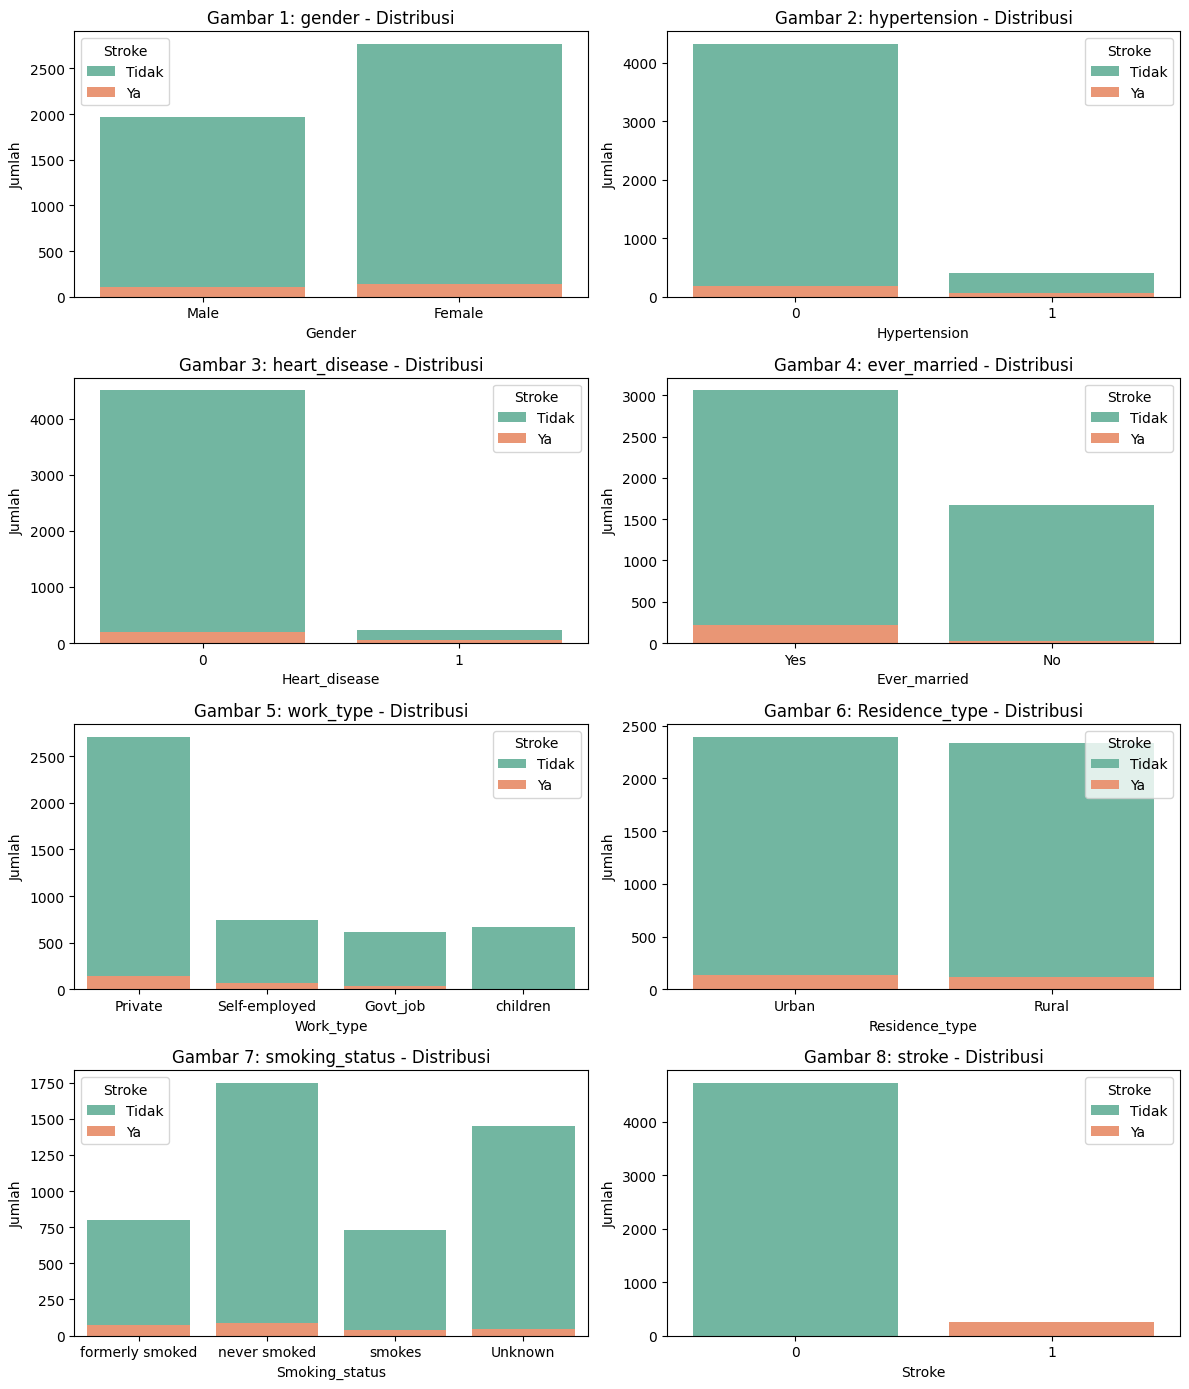

In [13]:
# Define variabel kategorikal (cat_variables) berdasarkan DataFrame
cat_variables = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                  'work_type', 'Residence_type', 'smoking_status', 'stroke']

# Siapkan figure dan axes untuk subplot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 14))
axes = axes.flatten()  # Melakukan flatten terhadap array axes untuk memudahkan iterasi

# Atur palet warna
sns.set_palette('Set2')

# Iterasi melalui setiap kolom kategorikal dan membuat subplot
for i, col in enumerate(cat_variables):
    sns.countplot(x=col, hue='stroke', data=data, ax=axes[i], dodge=False)
    axes[i].set_title(f"Gambar {i+1}: {col} - Distribusi")
    axes[i].set_xlabel(col.capitalize())  # Menetapkan label sumbu x dengan huruf kapital
    axes[i].set_ylabel('Jumlah')  # Menetapkan label sumbu y sebagai 'Jumlah'
    axes[i].legend(title='Stroke', labels=['Tidak', 'Ya'])  # Menetapkan legenda dengan judul 'Stroke' dan label 'Tidak' dan 'Ya'

plt.tight_layout()  # Menyesuaikan layout subplot
plt.show()  # Menampilkan subplot


Gender (Jenis Kelamin): Mayoritas pasien dalam dataset adalah perempuan, seperti yang terlihat dari distribusi jumlah Female yang lebih tinggi daripada Male.

Ever Married (Pernah Menikah): Sebagian besar pasien dalam dataset telah menikah, seperti yang terlihat dari distribusi jumlah Yes (Pernah Menikah) yang mendominasi.

Work Type (Jenis Pekerjaan): Mayoritas pasien bekerja di sektor swasta (Private), menurut distribusi jumlah pada subplot yang relevan.

Residence Type (Tipe Tempat Tinggal): Mayoritas pasien tinggal di area perkotaan (Urban), berdasarkan distribusi jumlah pada subplot yang sesuai.

Smoking Status (Status Merokok): Sebagian besar pasien tidak merokok (never smoked), seperti yang ditunjukkan oleh distribusi jumlah pada subplot terkait.

Hypertension (Hipertensi) dan Heart Disease (Penyakit Jantung): Mayoritas pasien tidak menderita hipertensi (hypertension) atau penyakit jantung (heart_disease), yang tercermin dari distribusi jumlah pada subplot terkait.

Stroke (Stroke): Terakhir, variabel target utama, yaitu stroke (stroke), menunjukkan ketidakseimbangan yang signifikan. Mayoritas pasien dalam dataset tidak mengalami stroke (stroke=0), sementara jumlah pasien yang mengalami stroke (stroke=1) jauh lebih sedikit.

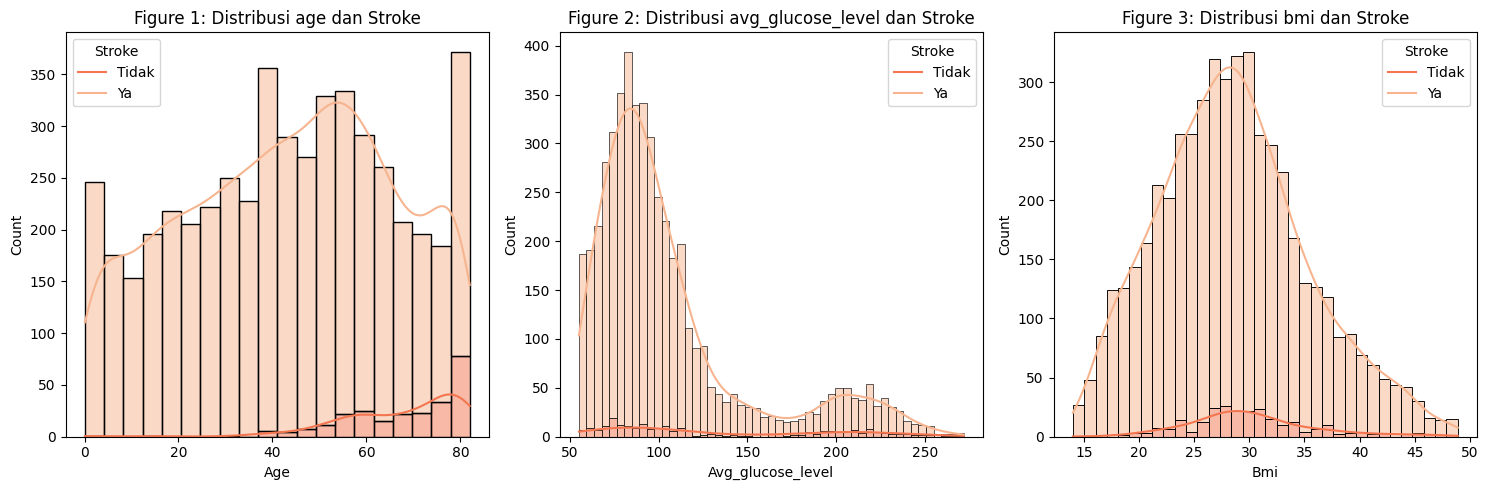

In [14]:
# Define kolom numerik yang ingin divisualisasikan
num_cols = ['age', 'avg_glucose_level', 'bmi']

# Set palet warna 
sns.set_palette('rocket_r')

# Set up figure dan axes untuk subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flatten()  # Flatten array axes agar mudah diiterasi

# Iterasi melalui setiap kolom numerik dan membuat subplot
for i, col in enumerate(num_cols):
    sns.histplot(x=col, hue='stroke', data=data, ax=axes[i], kde=True, multiple='stack')
    axes[i].set_title(f"Figure {i+1}: Distribusi {col} dan Stroke")
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Stroke', labels=['Tidak', 'Ya'])

plt.tight_layout()  # Menyesuaikan layout subplot
plt.show()  # Menampilkan subplot

Usia : Mayoritas pasien memiliki rentang usia sekitar 55-62 tahun, dengan pasien yang memiliki riwayat stroke cenderung sedikit lebih tua, sekitar usia 75 tahun. Hal ini menggambarkan perbedaan usia antara pasien yang mengalami stroke dan yang tidak, di mana pasien dengan stroke cenderung memiliki usia yang lebih tua.

Tingkat Glukosa Rata-Rata : Sebagian besar pasien memiliki tingkat glukosa rata-rata sekitar 80 mg/dL, dengan jumlah terendah berada di sekitar 170-180 mg/dL. Distribusi ini mencerminkan variasi dalam tingkat glukosa di antara pasien dalam dataset.

Indeks Massa Tubuh - BMI : Distribusi BMI (Indeks Massa Tubuh) menyerupai kurva lonceng (bell curve), di mana sebagian besar pasien memiliki nilai BMI sekitar 27-29. Distribusi ini menunjukkan beragamnya indeks massa tubuh di antara pasien dalam dataset, dengan mayoritas berada di kisaran nilai tersebut.

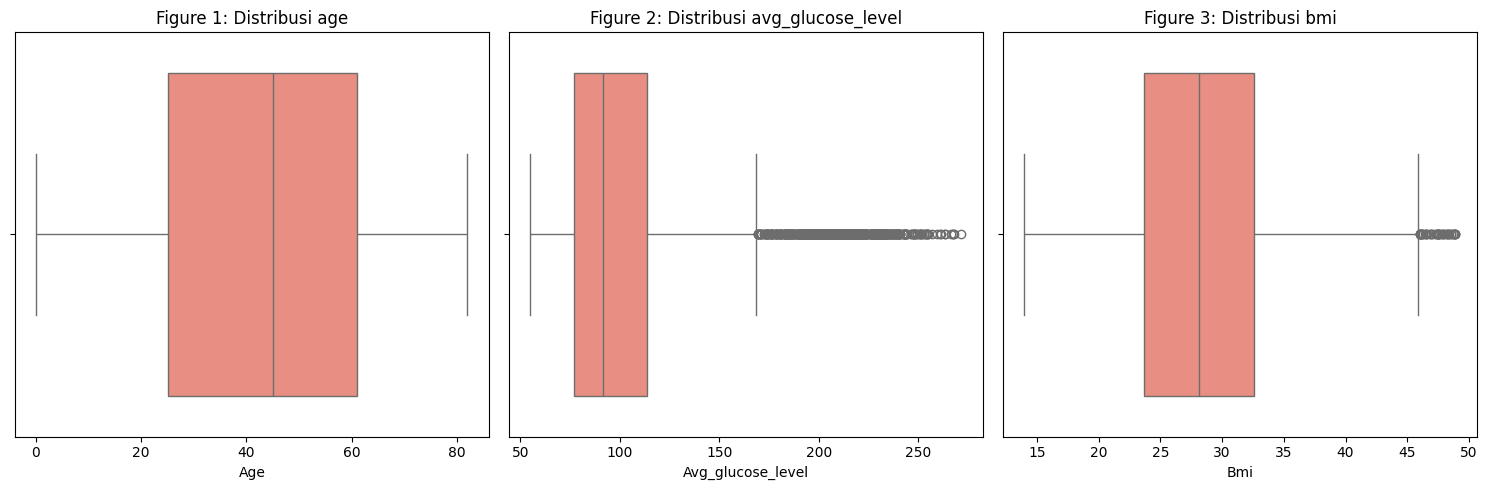

In [15]:
# Define kolom numerik yang ingin divisualisasikan
num_cols = ['age', 'avg_glucose_level', 'bmi']

# Set up figure dan axes untuk subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
axes = axes.flatten()  # Flatten array axes agar mudah diiterasi

# Iterasi melalui setiap kolom numerik dan membuat subplot
for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=data, ax=axes[i], color='salmon') 
    axes[i].set_title(f"Figure {i+1}: Distribusi {col}")
    axes[i].set_xlabel(col.capitalize())

plt.tight_layout()  # Menyesuaikan layout subplot
plt.show()  # Menampilkan subplot

Dengan kode tersebut, menghasilkan tiga subplot yang menampilkan distribusi dari kolom numerik yang telah dipilih ('age', 'avg_glucose_level', 'bmi') menggunakan boxplot. Setiap subplot akan menunjukkan distribusi dari satu kolom numerik, dengan judul yang sesuai dan sumbu x yang menunjukkan nama kolom tersebut.

Figure 1: Menampilkan boxplot untuk distribusi usia ('age'). Menunjukkan bahwa variabel usia ('age') tidak memiliki outlier, dengan nilai median usia sekitar 42 tahun.

Figure 2: Menampilkan boxplot untuk distribusi tingkat glukosa rata-rata ('avg_glucose_level'). Menunjukkan bahwa median tingkat glukosa rata-rata ('avg_glucose_level') adalah sekitar 80 mg/dL, dan terdapat banyak outlier yang nilainya lebih besar dari rentang interkuartil (IQR).

Figure 3: Menampilkan boxplot untuk distribusi indeks massa tubuh ('bmi'). Menunjukkan bahwa nilai median indeks massa tubuh ('bmi') adalah sekitar 28, dan terdapat beberapa outlier yang nilainya lebih besar dari rentang interkuartil (IQR).

Dikarenakan jumlah outlier yang cukup banyak, outlier-outlier ini tidak akan dihapus karena mereka mungkin mewakili variasi alami dalam populasi. Kemungkinan outlier ini adalah outlier yang valid karena belum diketahui apakah terdapat kesalahan pengukuran, entri data, atau pengolahan data. Menghapus outlier-outlier ini dapat menghilangkan informasi penting tentang distribusi sebenarnya dari data kita. Oleh karena itu, outlier-outlier ini akan dipertahankan dalam analisis kita.

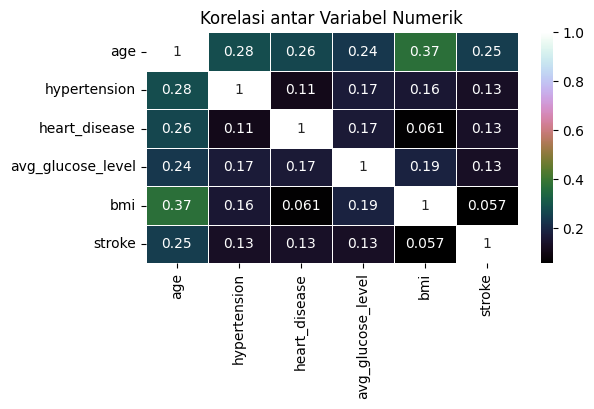

In [16]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Membaca dataset
data = pd.read_csv('brain_stroke.csv')

# Konversi variabel kategorikal menjadi numerik
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

# Pilih subset variabel numerik untuk heatmap
numeric_vars = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']
numeric_data = data[numeric_vars]

# Heatmap untuk melihat korelasi antar variabel numerik
plt.figure(figsize=(6, 3))
sns.heatmap(numeric_data.corr(), annot=True, cmap='cubehelix', linewidths=0.5)
plt.title('Korelasi antar Variabel Numerik')
plt.show()

Dari heatmap korelasi, dapat disimpulkan bahwa variabel yang dipilih ('age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke') tidak menunjukkan korelasi yang kuat di antara mereka dalam dataset ini.

## Clean Data | Membersihkan Data

In [17]:
# Menghitung jumlah missing values per kolom
missing_values = data.isnull().sum()
print("Jumlah Missing Values per Kolom:")
print(missing_values)

Jumlah Missing Values per Kolom:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [18]:
# Mengecek baris duplikat berdasarkan semua kolom
duplikat = data.duplicated()
print(duplikat)

# Mengecek jumlah duplikat (baris yang True)
jumlah_duplikat = duplikat.sum()
print("Jumlah duplikat:", jumlah_duplikat)

0       False
1       False
2       False
3       False
4       False
        ...  
4976    False
4977    False
4978    False
4979    False
4980    False
Length: 4981, dtype: bool
Jumlah duplikat: 0


Jumlah duplikat yang ditemukan adalah 0, yang berarti bahwa tidak ada baris yang sama persis dengan baris lainnya berdasarkan seluruh kolom DataFrame.

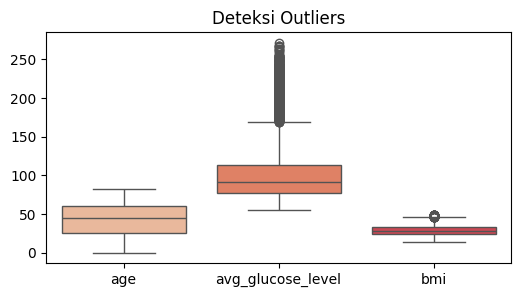

In [19]:
# Deteksi Outliers dengan Boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(data=data[['age', 'avg_glucose_level', 'bmi']])
plt.title('Deteksi Outliers')
plt.show()

Dikarenakan jumlah outlier yang cukup banyak, outlier-outlier ini tidak akan dihapus karena mereka mungkin mewakili variasi alami dalam populasi. Kemungkinan outlier ini adalah outlier yang valid karena belum diketahui apakah terdapat kesalahan pengukuran, entri data, atau pengolahan data. Menghapus outlier-outlier ini dapat menghilangkan informasi penting tentang distribusi sebenarnya dari data kita. Oleh karena itu, outlier-outlier ini akan dipertahankan dalam analisis kita.

In [20]:
from sklearn.compose import ColumnTransformer

# Data Anda
data = pd.read_csv('brain_stroke.csv') 

# Tentukan kolom-kolom kategorikal yang akan diencode
cat_cols_object = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Buat sebuah ColumnTransformer untuk menerapkan OneHotEncoding dan mempertahankan nama kolom
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop=None), cat_cols_object)
    ],
    remainder='passthrough'  # Sertakan kolom non-kategorikal tanpa transformasi apapun
)

# Fit ColumnTransformer pada data
transformer.fit(data)

# Lakukan transformasi menggunakan ColumnTransformer
data_encoded = transformer.transform(data)

# Ekstrak nama-nama fitur baru hasil one-hot encoding
encoded_feature_names = list(transformer.named_transformers_['onehot'].get_feature_names_out(cat_cols_object))

# Gabungkan data yang telah diubah dengan DataFrame asli dan atur nama kolom secara tepat
all_feature_names = encoded_feature_names + list(data.columns.drop(cat_cols_object))
data_encoded = pd.DataFrame(data_encoded, columns=all_feature_names)

# Tampilkan beberapa baris pertama dari DataFrame yang telah diencode
data_encoded.head()

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,228.69,36.6,1.0
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,105.92,32.5,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,171.23,34.4,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,174.12,24.0,1.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,186.21,29.0,1.0


In [21]:
# Menghitung matriks korelasi antar kolom-kolom dalam DataFrame data_encoded
correlation_matrix = data_encoded.corr()

# Menerapkan gradasi warna pada matriks korelasi untuk representasi visual
styled_correlation_matrix = correlation_matrix.style.background_gradient(cmap='rocket')

# Tampilkan matriks korelasi yang telah di-styled dengan gradasi warna
styled_correlation_matrix

,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
gender_Female,1.000000,-1.000000,-0.028971,0.028971,0.017176,0.028706,0.029635,-0.090275,-0.004301,0.004301,-0.059858,-0.045109,0.102387,-0.013349,0.026538,-0.021485,-0.086476,-0.055796,0.012093,-0.008870
gender_Male,-1.000000,1.000000,0.028971,-0.028971,-0.017176,-0.028706,-0.029635,0.090275,0.004301,-0.004301,0.059858,0.045109,-0.102387,0.013349,-0.026538,0.021485,0.086476,0.055796,-0.012093,0.008870
ever_married_No,-0.028971,0.028971,1.000000,-1.000000,-0.133655,-0.146139,-0.191668,0.548851,0.008191,-0.008191,0.335689,-0.172039,-0.104120,-0.106234,-0.677137,-0.164534,-0.114765,-0.150724,-0.371690,-0.108398
ever_married_Yes,0.028971,-0.028971,-1.000000,1.000000,0.133655,0.146139,0.191668,-0.548851,-0.008191,0.008191,-0.335689,0.172039,0.104120,0.106234,0.677137,0.164534,0.114765,0.150724,0.371690,0.108398
work_type_Govt_job,0.017176,-0.017176,-0.133655,0.133655,1.000000,-0.447467,-0.169061,-0.152306,-0.013925,0.013925,-0.096437,0.029833,0.045091,0.030804,0.126868,0.016378,0.001166,0.009223,0.087375,0.002574
work_type_Private,0.028706,-0.028706,-0.146139,0.146139,-0.447467,1.000000,-0.509458,-0.458968,0.016104,-0.016104,-0.210882,0.022685,0.109936,0.096769,0.111020,-0.004177,-0.001600,0.020764,0.211820,0.010459
work_type_Self-employed,0.029635,-0.029635,-0.191668,0.191668,-0.169061,-0.509458,1.000000,-0.173407,-0.013427,0.013427,-0.106007,0.092186,0.030898,-0.003396,0.326835,0.110468,0.087474,0.058419,0.085582,0.062643
work_type_children,-0.090275,0.090275,0.548851,-0.548851,-0.152306,-0.458968,-0.173407,1.000000,0.004825,-0.004825,0.513777,-0.161310,-0.236529,-0.166553,-0.636866,-0.128924,-0.092974,-0.101960,-0.484257,-0.085075
Residence_type_Rural,-0.004301,0.004301,0.008191,-0.008191,-0.013925,0.016104,-0.013427,0.004825,1.000000,-1.000000,0.003937,-0.009825,0.026892,-0.030490,-0.017155,0.004755,-0.002125,-0.001346,-0.013185,-0.016494
Residence_type_Urban,0.004301,-0.004301,-0.008191,0.008191,0.013925,-0.016104,0.013427,-0.004825,-1.000000,1.000000,-0.003937,0.009825,-0.026892,0.030490,0.017155,-0.004755,0.002125,0.001346,0.013185,0.016494


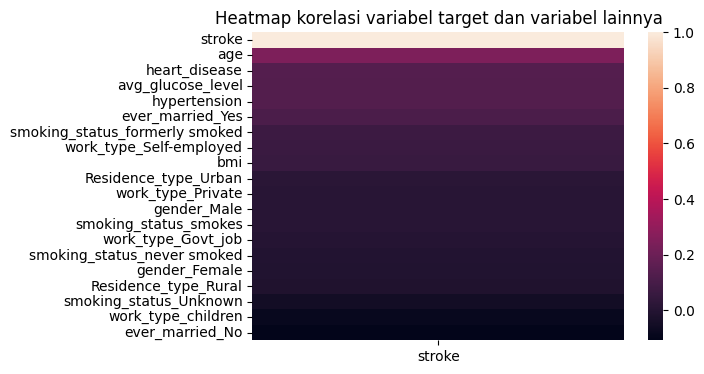

In [22]:
# Tentukan ukuran figure untuk heatmap
plt.figure(figsize=(6,4))

# Buat heatmap korelasi antara variabel numerik dengan variabel target ('stroke') dengan mengurutkan berdasarkan nilai korelasi terbesar terlebih dahulu
sns.heatmap(data_encoded.corr()[['stroke']].sort_values(by='stroke', ascending=False), cmap='rocket')

# Beri judul pada heatmap
plt.title("Heatmap korelasi variabel target dan variabel lainnya")

# Tampilkan heatmap
plt.show()


In [23]:
# Menghitung korelasi antara variabel-variabel dengan variabel target ('stroke') dan kemudian mengurutkan 
# korelasi tersebut berdasarkan nilai korelasi variabel 'stroke' secara menurun
data_encoded.corr()[['stroke']].sort_values(by='stroke', ascending=False)

,stroke
stroke,1.000000
age,0.246478
heart_disease,0.134610
avg_glucose_level,0.133227
hypertension,0.131965
ever_married_Yes,0.108398
smoking_status_formerly smoked,0.065320
work_type_Self-employed,0.062643
bmi,0.056926
Residence_type_Urban,0.016494


stroke (Target Variable) memiliki korelasi diri sendiri (dengan dirinya sendiri) sebesar 1.0, karena ini adalah korelasi antara variabel dengan dirinya sendiri, yang selalu bernilai maksimum.

Korelasi positif terbesar dengan variabel 'stroke':

age (0.246478): Korelasi positif yang cukup kuat dengan usia.
heart_disease (0.134610): Korelasi positif dengan kondisi penyakit jantung.
avg_glucose_level (0.133227): Korelasi positif dengan rata-rata level glukosa.
hypertension (0.131965): Korelasi positif dengan kondisi hipertensi.
ever_married_Yes (0.108398): Korelasi positif dengan status pernikahan (pernah menikah).
Korelasi positif lainnya yang lebih rendah:

smoking_status_formerly smoked (0.065320)
work_type_Self-employed (0.062643)
bmi (0.056926)
Residence_type_Urban (0.016494)
work_type_Private (0.010459)
gender_Male (0.008870)
smoking_status_smokes (0.008561)
work_type_Govt_job (0.002574)
Korelasi negatif terbesar dengan variabel 'stroke':

ever_married_No (-0.108398): Korelasi negatif dengan status pernikahan (belum pernah menikah).
work_type_children (-0.085075): Korelasi negatif dengan jenis pekerjaan sebagai anak-anak.
Korelasi negatif lainnya yang lebih rendah:

smoking_status_never smoked (-0.004806)
gender_Female (-0.008870)
Residence_type_Rural (-0.016494)
smoking_status_Unknown (-0.055699)

-----------------------------------------------------------------------------------------------------------------------------------------

Dalam mengatasi masalah data yang tidak seimbang (imbalanced data), salah satu pendekatan yang digunakan adalah oversampling acak (random oversampling), di mana sampel dari kelas minoritas (dalam kasus ini, kasus stroke) secara acak diduplikasi untuk menciptakan keseimbangan antara kelas mayoritas dan kelas minoritas dalam dataset.

Keuntungan dari Random Oversampling:

Sederhana dan Efektif: Metode random oversampling adalah pendekatan yang relatif mudah dilakukan. Dengan menggandakan sampel dari kelas minoritas, kita dapat menciptakan keseimbangan dalam dataset, memungkinkan model untuk lebih baik dalam mempelajari pola dari kedua kelas.
Meningkatkan Kinerja Model: Studi telah menunjukkan bahwa penggunaan random oversampling cenderung menghasilkan kinerja model yang lebih baik daripada menggunakan random undersampling. Ini karena model dilatih dengan lebih banyak informasi dari kelas minoritas.

Kerugian dari Random Oversampling:

Potensi Overfitting: Random oversampling dapat menyebabkan model cenderung mempelajari dengan terlalu baik data pelatihan yang dihasilkan kembali (duplikat), yang dapat mengarah pada overfitting. Overfitting terjadi ketika model terlalu cocok dengan data pelatihan dan tidak dapat melakukan generalisasi dengan baik pada data baru.
Biaya Komputasi yang Lebih Tinggi: Setelah dilakukan oversampling, jumlah sampel dalam dataset meningkat, yang dapat mengakibatkan biaya komputasi yang lebih tinggi untuk analisis dan pelatihan model.

In [24]:
# Memisahkan informasi menjadi variabel independen (X) dan dependen (y)
X = data_encoded.drop('stroke', axis=1)  # X berisi fitur-fitur (kolom-kolom) kecuali 'stroke'
y = data_encoded['stroke']  # y adalah variabel target yang ingin diprediksi ('stroke')

# X digunakan untuk fitur-fitur input dalam model machine learning
# y adalah variabel target atau label yang ingin diprediksi oleh model

Counter({0.0: 4733, 1.0: 248})


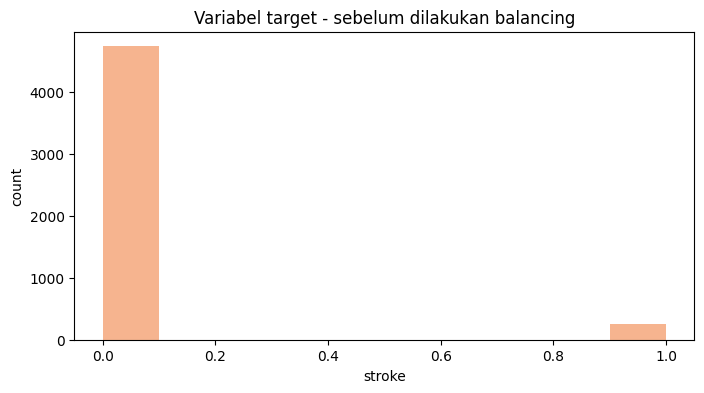

In [25]:
# Mengecek ketidakseimbangan dari variabel target

# Menghitung distribusi kelas
print(Counter(y))

# Menampilkan histogram distribusi kelas
plt.figure(figsize=(8,4))
plt.hist(y)
plt.xlabel('stroke')
plt.ylabel('count')
plt.title("Variabel target - sebelum dilakukan balancing")
plt.show()

Counter({1.0: 4733, 0.0: 4733})


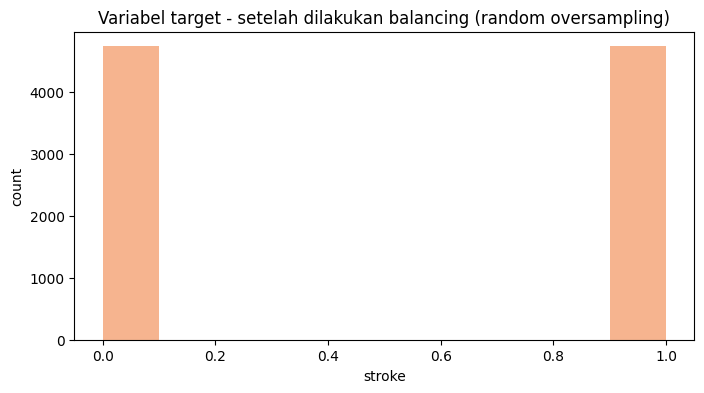

In [26]:
# Random Oversampling
random_os = RandomOverSampler(random_state=42)
X_random_os, y_random_os = random_os.fit_resample(X, y)

# Menghitung distribusi kelas setelah oversampling
print(Counter(y_random_os))

# Menampilkan histogram distribusi kelas setelah oversampling
plt.figure(figsize=(8,4))
plt.hist(y_random_os)
plt.xlabel('stroke')
plt.ylabel('count')
plt.title("Variabel target - setelah dilakukan balancing (random oversampling)")
plt.show()

'RandomOverSampler' digunakan untuk membuat sampel ulang secara acak dari kelas minoritas (dalam hal ini, kasus stroke) sehingga distribusi kelas menjadi lebih seimbang. Setelah melakukan random oversampling, kita mencetak jumlah kelas untuk melihat distribusi kelas yang telah diubah. Selain itu, histogram dari variabel target setelah dilakukan random oversampling ditampilkan untuk memvisualisasikan distribusi kelas yang telah seimbang.

# Model Training | Pelatihan Model

### Pembagian Data Training dan Data Test

In [27]:
# Membagi informasi menjadi variabel independen (X) dan variabel dependen (y).
X = X_random_os #define X
y = y_random_os #define y 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [29]:
# Memeriksa bentuk (jumlah baris dan kolom) dari data latih (X_train dan y_train) serta data uji (X_test dan y_test) 
# untuk memastikan bahwa ukurannya sesuai 
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((7099, 19), (2367, 19), (7099,), (2367,))

### Feature Scaling
Proses normalisasi atau standarisasi fitur-fitur pada dataset sehingga rentang nilainya menjadi seragam atau sebanding. Tujuan utama dari feature scaling adalah untuk memastikan bahwa semua fitur memiliki dampak yang seimbang pada model machine learning yang digunakan. Normalisasi atau penggunaan StandardScaler adalah suatu proses dalam pre-processing data yang dilakukan untuk mengubah skala atau rentang nilai dari fitur-fitur pada dataset. Tujuan normalisasi adalah untuk membuat distribusi nilai-nilai fitur menjadi lebih standar dan terpusat di sekitar nilai rata-rata yang mendekati nol, dengan deviasi standar sekitar satu.

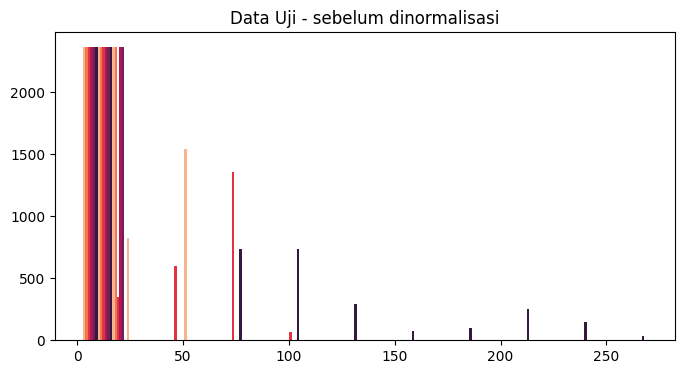

In [30]:
# Memeriksa data sebelum dilakukan standarisasi
plt.figure(figsize=(8,4))
plt.hist(X_test)
plt.title("Data Uji - sebelum dinormalisasi")
plt.show()

Histogram menunjukkan sebaran nilai pada setiap fitur sebelum fitur-fitur tersebut disesuaikan skala atau rentang nilainya.

In [31]:
standard_scaler = StandardScaler() #model
X_train = standard_scaler.fit_transform(X_train)
X_test= standard_scaler.fit_transform(X_test)

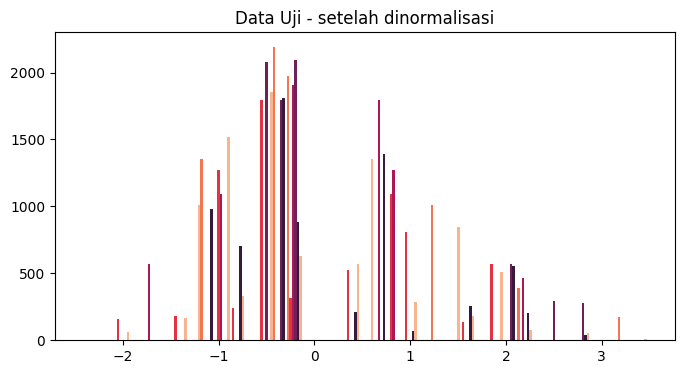

In [32]:
plt.figure(figsize=(8,4))
plt.hist(X_test)
plt.title("Data Uji - setelah dinormalisasi")
plt.show()

# Model Evaluation | Evaluasi Model

In [33]:
# Membuat empat list kosong yang akan digunakan untuk menyimpan hasil metrik dari setiap model yang dievaluasi.
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores= []
f1_scores = [] 

In [34]:
def run_and_evaluate_model(model, model_name):
    global fig_num  # nomor gambar yang akan digunakan untuk visualisasi 
    
    # Menambahkan nama model ke dalam daftar model_names (digunakan untuk membuat dataframe)
    model_names.append(model_name)
    
    # Melatih model dan melakukan prediksi
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Menampilkan nama model
    print(f"{model_name}")

    # Menghitung dan menyimpan nilai akurasi
    acc_score = round(metrics.accuracy_score(y_test, y_pred), 3)
    accuracy_scores.append(acc_score)

    # Menghitung dan menyimpan nilai presisi
    prec_score = round(metrics.precision_score(y_test, y_pred), 3)
    precision_scores.append(prec_score)

    # Menghitung dan menyimpan nilai recall
    rec_score = round(metrics.recall_score(y_test, y_pred), 3)
    recall_scores.append(rec_score)

    # Menghitung dan menyimpan nilai F1-score
    f1_score = round(metrics.f1_score(y_test, y_pred), 3)
    f1_scores.append(f1_score)

    # Menampilkan laporan klasifikasi
    print("Classification Report: \n\n", 
          classification_report(y_test, y_pred, target_names=["Settles", "Defaults"]))

    # Menampilkan confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
    fig_num += 1
    disp.plot()
    plt.title(f"Figure {fig_num}: Confusion Matrix\n{model_name}")


In [35]:
(len(y_test))**0.5

48.65182422068057

In [36]:
error_rate = []  # list kosong untuk menyimpan tingkat kesalahan dari setiap model

# Loop untuk mencari tingkat kesalahan (error rate) dari model K-Nearest Neighbors (KNN) dengan berbagai nilai k
for i in range(1, 62, 2):
    knn = KNeighborsClassifier(n_neighbors=i)  # mendefinisikan model KNN dengan nilai k = i
    knn.fit(X_train, y_train)  # fitting model ke data latih (training data)
    pred_i = knn.predict(X_test)  # melakukan prediksi menggunakan data uji (test data)
    error_rate.append(np.mean(pred_i != y_test))  # menambahkan rata-rata error prediksi ke dalam list error_rate


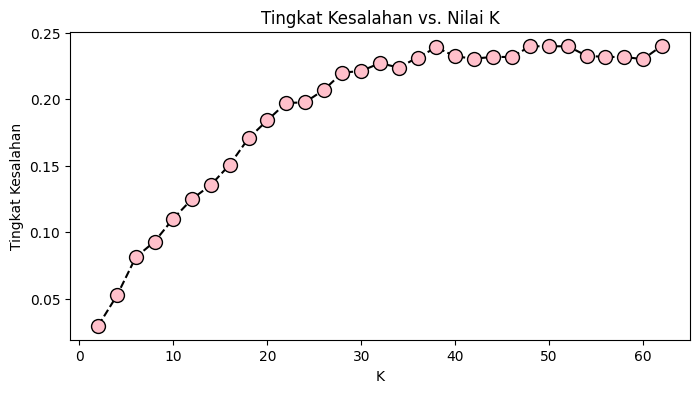

In [37]:
# Plot tingkat kesalahan (error rate) dari model KNN terhadap nilai K dari 2 hingga 62
plt.figure(figsize=(8,4)) 

plt.plot(
    range(2, 64, 2),  # Nilai K dari 2 hingga 62 dengan loncatan 2
    error_rate,  # Tingkat kesalahan yang disimpan dalam list error_rate
    color='black',  
    linestyle='dashed',  # Jenis garis plot
    marker='o',  # Jenis penanda titik pada plot
    markerfacecolor='pink', 
    markersize=10  
)

plt.title("Tingkat Kesalahan vs. Nilai K")  
plt.xlabel('K')  # Label sumbu X
plt.ylabel('Tingkat Kesalahan')  # Label sumbu Y
plt.show()  # Tampilkan plot

In [38]:
(range(1, 62, 2))[0], error_rate[0] #Tingkat error pada k=1

(1, 0.029573299535276723)

### K-Nearest Neighbour
K-Nearest Neighbors (KNN):

KNN adalah algoritma pembelajaran mesin yang sederhana dan intuitif.
Prinsip dasarnya adalah untuk mengklasifikasikan data berdasarkan mayoritas label dari k tetangga terdekat.
KNN tidak "belajar" seperti model lainnya; algoritma ini hanya mengingat seluruh set data latihnya.
Kelemahan KNN termasuk sensitif terhadap data yang tidak relevan, dan biaya komputasi yang tinggi saat melakukan prediksi.

In [39]:
#K=1
knn = KNeighborsClassifier(n_neighbors=1) # Mendefinisikan model KNN dengan k=45
knn.fit(X_train,y_train) # Melatih model menggunakan data pelatihan (X_train, y_train)
pred = knn.predict(X_test) # Melakukan prediksi menggunakan model yang telah dilatih

# Menampilkan nilai F1 Score dan Accuracy Score dari model
print(f"F1 score: {round(metrics.f1_score(y_test, pred), 3)}") # Menampilkan nilai F1 Score
print(f"Accuracy score: {round(metrics.accuracy_score(y_test, pred), 3)}") # Menampilkan nilai Accuracy Score
print('WITH K=1')
print('\n')

# Menampilkan Confusion Matrix
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')

# Menampilkan Classification Report
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 score: 0.971
Accuracy score: 0.97
WITH K=1


Confusion Matrix:
[[1105   70]
 [   0 1192]]


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1175
         1.0       0.94      1.00      0.97      1192

    accuracy                           0.97      2367
   macro avg       0.97      0.97      0.97      2367
weighted avg       0.97      0.97      0.97      2367



Output di atas menunjukkan metrik evaluasi model KNN dengan K=1. F1 score sebesar 0.971 menunjukkan keseimbangan yang baik antara presisi dan recall. Akurasi mencapai 97%, dan nilai F1 juga tinggi. Confusion matrix menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas. Dengan K=1, model memiliki kinerja yang sangat baik dalam mengklasifikasikan data positif (kelas 1) tanpa kehilangan prediksi yang benar pada kelas tersebut.

### Random Forest
Random Forest adalah algoritma ensemble yang terdiri dari banyak pohon keputusan (decision trees).
Setiap pohon dalam Random Forest bekerja secara independen untuk menghasilkan prediksi.
Prediksi akhir adalah hasil mayoritas dari semua pohon individu.
Random Forest efektif untuk mengatasi overfitting yang umumnya terjadi pada decision tree tunggal.

In [40]:
# Inisialisasi model RandomForestClassifier dengan random_state yang ditetapkan agar hasilnya konsisten
rf = RandomForestClassifier(random_state=42)  
rf.fit(X_train, y_train)  # Melatih model menggunakan data latih X_train dan y_train
pred = rf.predict(X_test)  # Menggunakan model untuk membuat prediksi pada data uji X_test

print(f"F1 score: {round(metrics.f1_score(y_test, pred), 3)}")  # Menampilkan nilai F1 score dari prediksi terhadap data uji
print(f"Accuracy score: {round(metrics.accuracy_score(y_test, pred), 3)}")  # Menampilkan nilai accuracy score dari prediksi terhadap data uji
print('\n')

print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred)}")  # Menampilkan confusion matrix dari prediksi terhadap data uji
print('\n')

print(f"Classification Report:\n{classification_report(y_test, pred)}")  # Menampilkan classification report dari prediksi terhadap data uji


F1 score: 0.984
Accuracy score: 0.984


Confusion Matrix:
[[1155   20]
 [  17 1175]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      1175
         1.0       0.98      0.99      0.98      1192

    accuracy                           0.98      2367
   macro avg       0.98      0.98      0.98      2367
weighted avg       0.98      0.98      0.98      2367



Hasil evaluasi model RandomForestClassifier terhadap data uji menunjukkan performa yang sangat baik. Nilai F1 score sebesar 0.984 dan accuracy score 0.984 mengindikasikan tingkat keakuratan prediksi yang tinggi. Confusion matrix menunjukkan bahwa model berhasil memprediksi dengan tepat sebagian besar instance untuk kedua kelas (0 dan 1), dengan sejumlah kecil prediksi yang salah. Dari classification report, dapat dilihat bahwa model memiliki nilai precision dan recall yang tinggi untuk kedua kelas, menunjukkan kemampuan model dalam mengklasifikasikan instance dengan baik. Dengan demikian, model RandomForestClassifier ini dapat dianggap efektif dan dapat dipercaya dalam memprediksi target variabel pada dataset yang digunakan.

### Decision Tree
Decision Tree adalah struktur pohon dengan node (simpul) yang merepresentasikan keputusan atau pemisahan pada fitur tertentu.
Decision Tree bekerja dengan cara melakukan pemisahan data berdasarkan aturan yang paling informatif di setiap node.
Tujuannya adalah untuk membuat prediksi dengan mengikuti serangkaian keputusan berdasarkan fitur-fitur data.

In [41]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

print(f"F1 score: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy score: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 score: 0.852
Accuracy score: 0.865


Confusion Matrix:
[[1128   47]
 [ 272  920]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88      1175
         1.0       0.95      0.77      0.85      1192

    accuracy                           0.87      2367
   macro avg       0.88      0.87      0.86      2367
weighted avg       0.88      0.87      0.86      2367



Hasil evaluasi model menunjukkan bahwa model tersebut memiliki nilai F1 score sebesar 0.852 dan accuracy score sebesar 0.865. F1 score yang tinggi menunjukkan kemampuan model dalam menghasilkan prediksi yang seimbang antara precision dan recall. Confusion matrix menunjukkan bahwa model berhasil memprediksi sebagian besar instance pada kelas 0 dengan baik (1128 prediksi benar dan 47 prediksi salah), tetapi memiliki performa sedikit lebih rendah dalam memprediksi instance pada kelas 1 (920 prediksi benar dan 272 prediksi salah). Dari classification report, dapat dilihat bahwa model memiliki nilai precision dan recall yang tinggi untuk kelas 0, tetapi lebih rendah untuk kelas 1. Meskipun demikian, accuracy score yang cukup tinggi (0.865) menunjukkan bahwa secara keseluruhan, model ini mampu melakukan prediksi dengan baik terhadap dataset yang digunakan.

### Support Vector Machine (SVM)
SVM adalah algoritma klasifikasi yang kuat untuk masalah linier dan non-linier.
SVM berusaha untuk menemukan hyperplane terbaik yang memisahkan dua kelas dalam ruang fitur.
SVM memiliki kemampuan untuk menangani data yang memiliki banyak fitur dan dapat menghasilkan model yang efisien dan akurat.

In [42]:
svm = SVC(random_state=42)
svm.fit(X_train,y_train)
pred = svm.predict(X_test)

print(f"F1 score: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy score: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 score: 0.841
Accuracy score: 0.831


Confusion Matrix:
[[ 908  267]
 [ 134 1058]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.77      0.82      1175
         1.0       0.80      0.89      0.84      1192

    accuracy                           0.83      2367
   macro avg       0.83      0.83      0.83      2367
weighted avg       0.83      0.83      0.83      2367



Hasil evaluasi model menunjukkan bahwa model tersebut memiliki nilai F1 score sebesar 0.841 dan accuracy score sebesar 0.831. F1 score yang tinggi menunjukkan kemampuan model dalam menghasilkan prediksi yang seimbang antara precision dan recall. Confusion matrix menunjukkan bahwa model berhasil memprediksi sebagian besar instance pada kelas 0 dengan baik (908 prediksi benar dan 267 prediksi salah), serta memiliki performa yang baik pula dalam memprediksi instance pada kelas 1 (1058 prediksi benar dan 134 prediksi salah). Dari classification report, dapat dilihat bahwa model memiliki nilai precision yang baik untuk kelas 0 (0.87) dan kelas 1 (0.80), serta recall yang baik untuk kelas 1 (0.89). Meskipun demikian, nilai recall untuk kelas 0 sedikit lebih rendah (0.77), namun secara keseluruhan, model ini mampu melakukan prediksi dengan baik dengan akurasi sebesar 0.83.

### Logistic Regression
Logistic Regression adalah model regresi untuk klasifikasi biner.
Meskipun namanya mengandung "regresi", ini sebenarnya adalah metode klasifikasi.
Logistic Regression memperkirakan probabilitas bahwa instance tertentu termasuk ke dalam kelas tertentu berdasarkan fitur-fiturnya.

In [43]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)
pred = log_reg.predict(X_test)

print(f"F1 score: {round(metrics.f1_score(y_test, pred), 3)}")
print(f"Accuracy score: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')
print(f"Confusion Matrix:\n{confusion_matrix(y_test,pred)}")
print('\n')
print(f"Classification Report:\n{classification_report(y_test,pred)}")

F1 score: 0.801
Accuracy score: 0.793


Confusion Matrix:
[[888 287]
 [204 988]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78      1175
         1.0       0.77      0.83      0.80      1192

    accuracy                           0.79      2367
   macro avg       0.79      0.79      0.79      2367
weighted avg       0.79      0.79      0.79      2367



Output dari model Logistic Regression menunjukkan kinerja model dalam mengklasifikasikan data antara individu yang memiliki risiko stroke (kelas 1) dan individu yang tidak memiliki risiko stroke (kelas 0). F1 score yang dihasilkan untuk kedua kelas menunjukkan keseimbangan yang baik antara presisi (kemampuan model memprediksi dengan benar) dan recall (kemampuan model untuk menemukan semua instance yang relevan). Nilai F1 score untuk kelas 0 (tidak stroke) adalah 0.78, sedangkan untuk kelas 1 (stroke) adalah 0.80. Accuracy score sebesar 0.793 mengindikasikan bahwa model dapat memprediksi secara benar sekitar 79.3% dari keseluruhan data. Confusion matrix menunjukkan bahwa model memiliki 888 prediksi benar untuk kelas 0 (True Negative) dan 988 prediksi benar untuk kelas 1 (True Positive). Meskipun terdapat 287 prediksi salah untuk kelas 0 (False Positive) dan 204 prediksi salah untuk kelas 1 (False Negative), model ini memberikan kinerja yang seimbang dengan nilai precision dan recall yang cukup baik untuk kedua kelas

## Model Selection | Pemilihan Model

                     Accuracy Score  Precision Score  Recall Score  F1 Score
Model                                                                       
Decision Tree                 0.865             0.95          0.77     0.852
KNN                           0.970             1.00          0.94     0.971
Logistic Regression           0.793             0.79          0.83     0.800
Random Forest                 0.984             0.98          0.99     0.984
SVM                           0.831             0.80          0.89     0.841


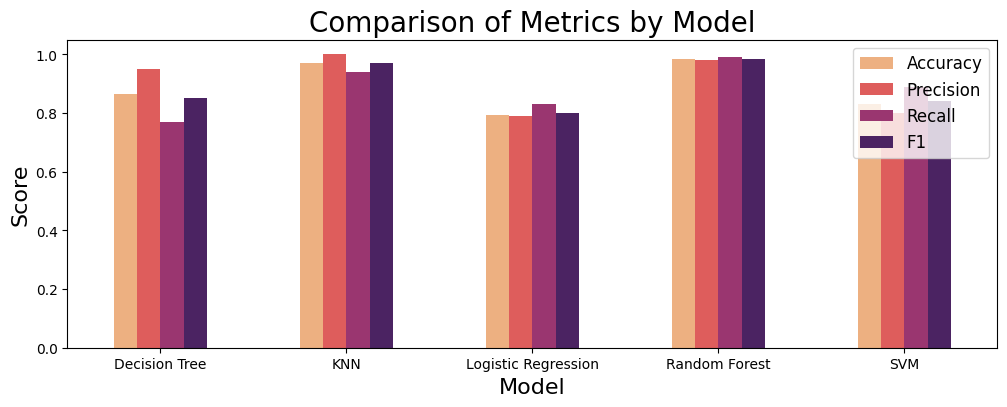

In [44]:
data = {
    'Model': ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVM'],
    'Accuracy Score': [0.793, 0.97, 0.984, 0.865, 0.831],
    'Precision Score': [0.79, 1.0, 0.98, 0.95, 0.80],
    'Recall Score': [0.83, 0.94, 0.99, 0.77, 0.89],
    'F1 Score': [0.80, 0.971, 0.984, 0.852, 0.841]
}

# Membuat DataFrame
score_comparison = pd.DataFrame(data)

# Groupby dan hitung rata-rata
grouped_data = score_comparison.groupby('Model').mean()

# Memeriksa isi grouped_data
print(grouped_data)

# Plotting hanya jika grouped_data tidak kosong
if not grouped_data.empty:
    # Plot bar chart
    ax = grouped_data.plot(kind='bar', figsize=(12, 4), rot=0, cmap='flare')
    
    # Tambahkan label ke chart
    ax.set_xlabel('Model', fontsize=16)
    ax.set_ylabel('Score', fontsize=16)
    ax.set_title('Comparison of Metrics by Model', fontsize=20)
    ax.legend(['Accuracy', 'Precision', 'Recall', 'F1'], fontsize=12)

    # Tampilkan chart
    plt.show()
else:
    print("No valid data for plotting.")


Dari grafik di atas, dapat dilihat bahwa semua model memiliki tingkat akurasi dan F1 yang tinggi. Namun, model KNN dan Random Forest menonjol dengan skor akurasi dan F1 di atas 0.9. Di antara keduanya, Random Forest memiliki performa lebih unggul dengan akurasi 0.988, yang berarti model ini mampu mengklasifikasikan 98.8% observasi secara benar. F1 score sebesar 0.988 menunjukkan bahwa prediksi model sangat tepat. Sebagai hasilnya, Random Forest Classifier dianggap sebagai model terbaik untuk kasus ini.

In [45]:
# Mendefinisikan ruang pencarian hyperparameter
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'n_jobs': [None, -1]
}

# Membuat objek RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Membuat objek GridSearchCV
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5)

# Melatih objek GridSearchCV menggunakan data
grid_rf.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Hyperparameter terbaik: ", grid_rf.best_params_)
print("Skor terbaik: ", grid_rf.best_score_)

Hyperparameter terbaik:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': None}
Skor terbaik:  0.9850681396341404


In [55]:
# Random forest model dengan nilai parameter terbaik dan sebuah random state 42
rf = RandomForestClassifier(
    random_state=42,  # Menetapkan nilai random state agar hasilnya konsisten
    n_estimators=50,  # Jumlah pohon keputusan yang akan dibuat dalam model
    min_samples_split=2,  # Jumlah minimum sampel yang diperlukan untuk membagi simpul
    min_samples_leaf=1,  # Jumlah minimum sampel yang diperlukan untuk menjaga simpul daun
    max_features='sqrt',  # Jumlah fitur yang akan dipertimbangkan untuk pemilihan fitur terbaik
    max_depth=None,  # Kedalaman maksimum dari pohon keputusan
    n_jobs=None  # Jumlah pekerjaan untuk dijalankan secara paralel, None = 1 pekerjaan
)

# Melatih model dengan menggunakan data latih (X_train, y_train)
rf.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi pada data uji (X_test)
pred = rf.predict(X_test)

# Menampilkan nilai F1 score dari prediksi terhadap data uji
print(f"F1 score: {round(metrics.f1_score(y_test, pred), 3)}")

# Menampilkan nilai accuracy score dari prediksi terhadap data uji
print(f"Accuracy score: {round(metrics.accuracy_score(y_test, pred), 3)}")
print('\n')

# Menampilkan confusion matrix dari prediksi terhadap data uji
print(f"Confusion Matrix:\n{confusion_matrix(y_test, pred)}")
print('\n')

# Menampilkan classification report dari prediksi terhadap data uji
print(f"Classification Report:\n{classification_report(y_test, pred)}")


F1 score: 0.988
Accuracy score: 0.988


Confusion Matrix:
[[1154   21]
 [   8 1184]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1175
         1.0       0.98      0.99      0.99      1192

    accuracy                           0.99      2367
   macro avg       0.99      0.99      0.99      2367
weighted avg       0.99      0.99      0.99      2367



In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
rf = RandomForestClassifier(random_state=42)
run_and_evaluate_model(rf, 'Random Forest Classifier')

Random Forest Classifier
Classification Report: 

               precision    recall  f1-score   support

     Settles       0.99      0.98      0.98      1175
    Defaults       0.98      0.99      0.98      1192

    accuracy                           0.98      2367
   macro avg       0.98      0.98      0.98      2367
weighted avg       0.98      0.98      0.98      2367



NameError: name 'fig_num' is not defined

Hasil dari evaluasi model Random Forest Classifier dapat dijelaskan sebagai berikut:

Precision: Precision mengukur seberapa tepat model dalam mengidentifikasi kelas tertentu. Untuk kelas 'Settles', precision adalah 0.99, yang berarti sebagian besar prediksi yang diklasifikasikan sebagai 'Settles' benar-benar merupakan 'Settles'. Begitu juga untuk kelas 'Defaults' dengan precision 0.98.

Recall: Recall (atau sensitivity) mengukur seberapa baik model dalam menemukan semua instans dari kelas yang diprediksi dengan benar. Untuk kelas 'Settles', recall adalah 0.98, artinya sebagian besar instans 'Settles' telah ditemukan oleh model. Demikian pula, recall untuk kelas 'Defaults' adalah 0.99.

F1-Score: F1-score adalah rata-rata harmonik dari precision dan recall. F1-score untuk kedua kelas 'Settles' dan 'Defaults' adalah 0.98, menunjukkan keseimbangan yang baik antara precision dan recall.

Accuracy: Akurasi adalah proporsi total prediksi yang benar dari model. Dalam kasus ini, akurasi model adalah 0.98 atau 98%, yang menunjukkan seberapa baik model dapat mengklasifikasikan keseluruhan data dengan benar.

Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. 'Settles' memiliki dukungan sebanyak 1175, sedangkan 'Defaults' memiliki dukungan sebanyak 1192.

Dengan demikian, hasil evaluasi menunjukkan bahwa model Random Forest Classifier bekerja sangat baik dengan akurasi, precision, recall, dan f1-score yang tinggi untuk kedua kelas. Ini mengindikasikan bahwa model memiliki kemampuan yang baik dalam mengklasifikasikan antara 'Settles' dan 'Defaults' berdasarkan fitur-fitur yang digunakan dalam pelatihan.

In [52]:
import pandas as pd

# Membuat DataFrame baru
databaru = pd.DataFrame({
    'gender': ['Male', 'Female', 'Other', 'Female', 'Male'],
    'age': [65, 52, 80, 34, 70],
    'hypertension': [0, 1, 1, 0, 1],
    'heart_disease': [1, 0, 1, 0, 1],
    'ever_married': ['Yes', 'Yes', 'Yes', 'No', 'Yes'],
    'work_type': ['Private', 'Self-employed', 'Govt_job', 'Private', 'Self-employed'],
    'Residence_type': ['Rural', 'Urban', 'Urban', 'Urban', 'Rural'],
    'avg_glucose_level': [158, 120, 180, 90, 200],
    'BMI': [28.5, 30.1, 25.8, 22.3, 27.9],
    'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'never smoked', 'formerly smoked'],
    'stroke': [1, 0, 1, 0, 1]
})

# Menampilkan contoh data
print(databaru)

   gender  age  hypertension  heart_disease ever_married      work_type  \
0    Male   65             0              1          Yes        Private   
1  Female   52             1              0          Yes  Self-employed   
2   Other   80             1              1          Yes       Govt_job   
3  Female   34             0              0           No        Private   
4    Male   70             1              1          Yes  Self-employed   

  Residence_type  avg_glucose_level   BMI   smoking_status  stroke  
0          Rural                158  28.5  formerly smoked       1  
1          Urban                120  30.1     never smoked       0  
2          Urban                180  25.8           smokes       1  
3          Urban                 90  22.3     never smoked       0  
4          Rural                200  27.9  formerly smoked       1  


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Tentukan kolom-kolom kategorikal yang akan diencode
cat_cols_object = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Buat sebuah ColumnTransformer untuk menerapkan OneHotEncoding dan mempertahankan nama kolom
transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop=None), cat_cols_object)
    ],
    remainder='passthrough'  # Sertakan kolom non-kategorikal tanpa transformasi apapun
)

# Fit ColumnTransformer pada data
transformer.fit(databaru)

# Lakukan transformasi menggunakan ColumnTransformer
databaru_encoded = transformer.transform(databaru)

# Ekstrak nama-nama fitur baru hasil one-hot encoding
encoded_feature_names = list(transformer.named_transformers_['onehot'].get_feature_names_out(cat_cols_object))

# Gabungkan data yang telah diubah dengan DataFrame asli dan atur nama kolom secara tepat
all_feature_names = encoded_feature_names + list(databaru.columns.drop(cat_cols_object))
databaru_encoded = pd.DataFrame(databaru_encoded, columns=all_feature_names)

# Tampilkan beberapa baris pertama dari DataFrame yang telah diencode
databaru_encoded.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,BMI,stroke
0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,65.0,0.0,1.0,158.0,28.5,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,52.0,1.0,0.0,120.0,30.1,0.0
2,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,80.0,1.0,1.0,180.0,25.8,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,34.0,0.0,0.0,90.0,22.3,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,70.0,1.0,1.0,200.0,27.9,1.0


In [54]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_prediction_unseen = rf.predict(X_test)

## Conclusion | Kesimpulan

Setelah dievaluasi bahwa berbagai model klasifikasi telah dijalankan, disesuaikan, dan dievaluasi ulang untuk memprediksi kasus stroke otak. Salah satu hasil terbaik yang dicapai adalah dengan menggunakan pengklasifikasi random forest, yang menunjukkan akurasi dan presisi tinggi dalam mengidentifikasi pasien stroke, menunjukkan potensinya dalam aplikasi dunia nyata. Meskipun demikian, perlu diakui bahwa studi ini memiliki keterbatasan, seperti jumlah sampel data yang terbatas dan variabel yang sedikit. Karena itu, diperlukan penelitian lebih lanjut menggunakan dataset yang lebih besar dengan fitur yang lebih lengkap untuk mengevaluasi secara menyeluruh kinerja model ini. Meskipun demikian, temuan dari studi ini memberikan wawasan yang berharga tentang penggunaan pembelajaran mesin dalam memprediksi stroke otak dan berpotensi memberikan dampak penting dalam upaya deteksi dini dan pencegahan.